In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv('sph6004_assignment1_data.csv')
data.drop('race',axis = 1,inplace= True)
data.replace('F',0,inplace = True)
data.replace('M',1,inplace = True)
data.drop('id',axis = 1, inplace= True)

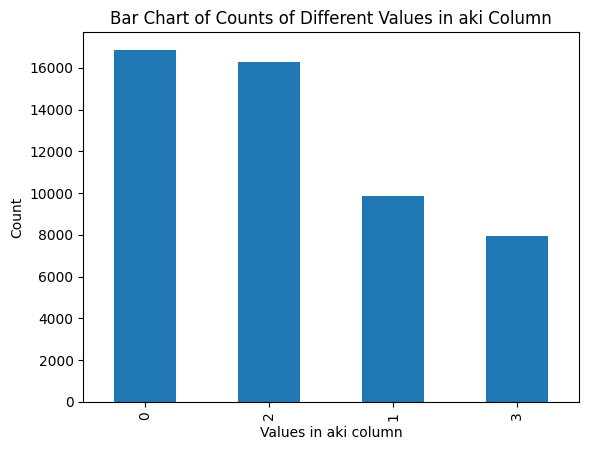

In [12]:


aki_counts = data['aki'].value_counts()

# Creating the bar chart
aki_counts.plot(kind='bar')
plt.xlabel('Values in aki column')
plt.ylabel('Count')
plt.title('Bar Chart of Counts of Different Values in aki Column')
plt.show()


In [14]:
# Correlation matrix
correlation_matrix = data.corr()

# Correlation of features with AKI
aki_correlation = correlation_matrix['aki']
aki_correlations_sorted = aki_correlation.sort_values(ascending=False)

# Display the correlations
print(aki_correlations_sorted)


aki                       1.000000
aado2_max                 0.241974
bun_max                   0.241456
bun_min                   0.233869
aado2_min                 0.195278
bilirubin_direct_max      0.173581
admission_age             0.172612
potassium_max.1           0.166625
bilirubin_direct_min      0.161947
aniongap_max              0.155740
gcs_unable                0.155630
bilirubin_total_max       0.155386
bilirubin_indirect_max    0.145152
bilirubin_total_min       0.144556
d_dimer_max               0.142231
d_dimer_min               0.141629
resp_rate_mean            0.138543
ptt_max                   0.138513
pt_max                    0.137220
weight_admit              0.135205
inr_max                   0.131953
imm_granulocytes_max      0.129844
bilirubin_indirect_min    0.125846
resp_rate_max             0.123859
pt_min                    0.121343
ld_ldh_max                0.119029
lactate_max               0.118897
aado2_calc_max            0.118473
imm_granulocytes_min

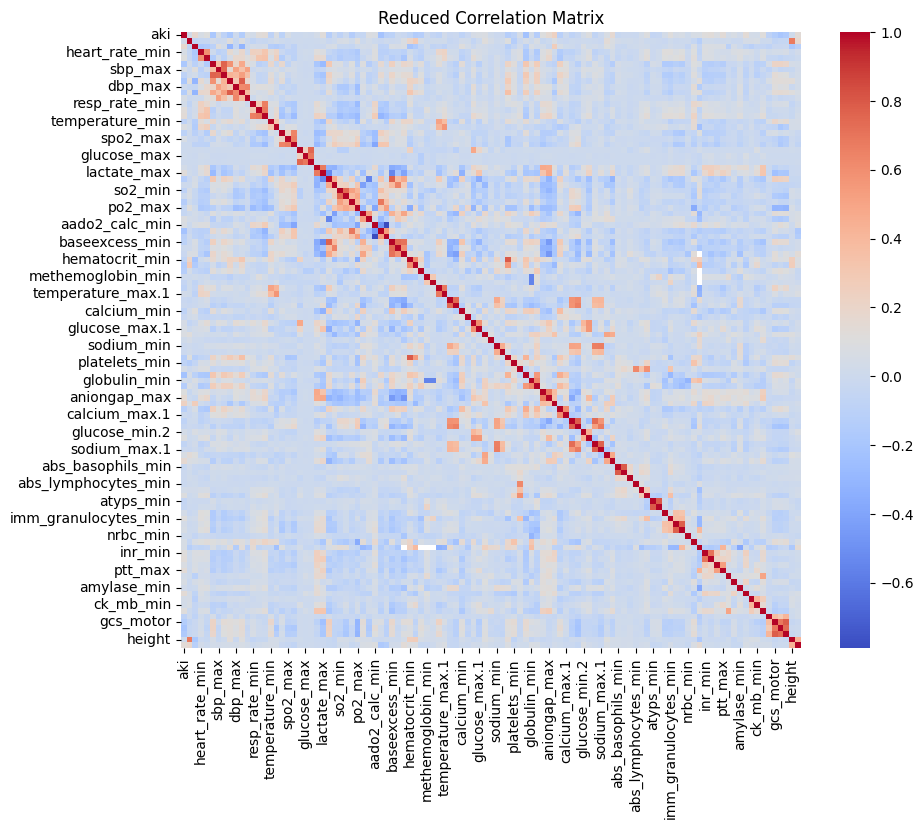

In [18]:
# Plotting the correlations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Set a threshold
threshold = 0.8

# Create a mask to identify highly correlated features
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Drop highly correlated features
reduced_df = data.drop(to_drop, axis=1)

# Recompute the correlation matrix for the reduced DataFrame
reduced_corr_matrix = reduced_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=False, cmap='coolwarm')
plt.title("Reduced Correlation Matrix")
plt.show()



In [2]:
# Assuming 'data' is your DataFrame
# Step 1: Compute the correlation matrix
corr_matrix = data.corr().abs()

# Step 2: Find pairs of highly correlated features
high_corr_var = set()
threshold = 0.75

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i] # getting the name of column
            high_corr_var.add(colname)

# Step 3: Drop these features from the DataFrame
data_reduced = data.drop(columns=high_corr_var)
data_reduced.head()
# Now 'data_reduced' is your DataFrame with reduced features


,aki,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,dbp_min,dbp_max,mbp_max,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,aado2_calc_min,baseexcess_max,bicarbonate_min,hematocrit_min,hematocrit_max,carboxyhemoglobin_min,methemoglobin_min,methemoglobin_max,temperature_min.1,temperature_max.1,chloride_min,chloride_max,calcium_min,calcium_max,glucose_min.1,glucose_max.1,potassium_min,potassium_max,sodium_min,sodium_max,platelets_min,wbc_min,albumin_min,globulin_min,total_protein_min,aniongap_min,aniongap_max,bun_min,calcium_min.1,calcium_max.1,chloride_min.1,glucose_min.2,glucose_max.2,sodium_min.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_eosinophils_min,abs_lymphocytes_min,abs_monocytes_min,abs_neutrophils_min,atyps_min,bands_min,imm_granulocytes_min,metas_min,nrbc_min,fibrinogen_min,thrombin_min,inr_min,inr_max,ptt_min,ptt_max,alt_min,alp_min,amylase_min,bilirubin_total_min,ck_cpk_min,ck_mb_min,ld_ldh_min,gcs_min,gcs_motor,gcs_verbal,height,weight_admit
0,3,0,79.953141,96.0,104.0,103.0,126.0,40.0,58.0,69.0,13.0,24.0,16.833333,35.89,36.39,96.0,100.0,98.916667,76.0,211.0,2.3,2.3,7.40,7.40,98.0,98.0,101.0,101.0,47.0,47.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,5.2,5.2,129.0,129.0,304.0,11.0,2.6,NaN,NaN,15.0,20.0,47.0,8.1,9.0,93.0,76.0,167.0,131.0,4.8,6.7,0.0000,0.0000,0.2200,0.5480,7.8100,0.0,5.0,NaN,1.0,NaN,NaN,NaN,1.1,1.1,28.6,29.5,103.0,992.0,NaN,6.8,NaN,NaN,236.0,15.0,6.0,5.0,157.0,110.0
1,0,0,78.194169,72.0,134.0,97.0,127.0,56.0,89.0,96.0,17.0,38.0,29.611111,36.28,37.00,91.0,98.0,95.444444,127.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,12.0,3.7,NaN,NaN,13.0,22.0,23.0,7.9,8.4,89.0,127.0,143.0,126.0,2.9,4.5,0.0294,0.0147,1.5141,0.5586,12.5832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,2.3,28.4,150.0,272.0,282.0,NaN,1.9,175.0,8.0,NaN,15.0,6.0,5.0,NaN,82.0
2,2,0,65.602396,60.0,97.0,95.0,143.0,56.0,99.0,108.0,14.0,19.0,16.000000,36.67,37.00,94.0,100.0,97.166667,207.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,7.5,NaN,NaN,NaN,12.0,12.0,8.0,8.7,8.7,102.0,266.0,266.0,137.0,3.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.1,26.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,5.0,NaN,62.1
3,2,0,64.906629,59.0,87.0,113.0,150.0,60.0,94.0,109.0,14.0,31.0,22.518519,36.83,37.28,89.0,100.0,94.800000,111.0,120.0,1.7,1.7,7.38,7.50,70.0,70.0,42.0,64.0,49.0,65.0,144.95,12.0,NaN,NaN,NaN,NaN,NaN,NaN,37.1,37.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,5.1,3.2,NaN,NaN,10.0,11.0,39.0,8.3,9.5,92.0,120.0,136.0,140.0,4.3,4.5,0.0400,0.0100,0.9900,0.4600,5.6200,NaN,NaN,0.4,NaN,1.4,NaN,NaN,1.2,1.2,26.1,26.1,10.0,76.0,NaN,0.7,NaN,NaN,NaN,15.0,1.0,0.0,170.0,113.1
4,2,1,57.438861,57.0,100.0,81.0,127.0,47.0,95.0,100.0,18.0,32.0,24.230159,36.78,38.33,90.0,99.0,95.951613,158.0,213.0,1.5,2.8,7.30,7.35,80.0,80.0,45.0,216.0,31.0,39.0,441.15,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,36.7,36.9,NaN,NaN,1.08,1.15,NaN,NaN,NaN,NaN,NaN,NaN,147.0,14.6,4.4,NaN,NaN,13.0,16.0,22.0,7.5,8.0,103.0,132.0,196.0,137.0,4.2,4.5,0.0292,0.0584,0.5402,0.1022,13.8554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.1,27.7,39.4,20.0,60.0,NaN,0.6,NaN,NaN,NaN,15.0,NaN,0.0,178.0,97.4


In [37]:
data_reduced.shape

(50920, 94)

In [12]:
print(data_reduced.isnull().sum())

id                           0
aki                          0
gender                       0
admission_age                0
heart_rate_min              79
heart_rate_max              79
sbp_min                     97
sbp_max                     97
dbp_min                     97
dbp_max                     97
mbp_max                    115
resp_rate_min              143
resp_rate_max              143
resp_rate_mean             143
temperature_min           1641
temperature_max           1641
spo2_min                   123
spo2_max                   123
spo2_mean                  123
glucose_min               1174
glucose_max               1174
lactate_min              23759
lactate_max              23759
ph_min                   19748
ph_max                   19748
so2_min                  35221
so2_max                  35221
po2_min                  19743
po2_max                  19743
pco2_min                 19744
pco2_max                 19744
aado2_calc_min           29835
baseexce

In [3]:
# Assuming 'data' is your DataFrame
# Calculate the percentage of missing values for each column
missing_percentage = data_reduced.isnull().mean() * 100

# Identify columns where the percentage of missing values is greater than 80%
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Drop these columns
data_cleaned = data_reduced.drop(columns=columns_to_drop)
data_cleaned.head()
# Now 'data_cleaned' is your DataFrame with columns having more than 80% missing values removed

,aki,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,dbp_min,dbp_max,mbp_max,resp_rate_min,resp_rate_max,resp_rate_mean,temperature_min,temperature_max,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,lactate_min,lactate_max,ph_min,ph_max,so2_min,so2_max,po2_min,po2_max,pco2_min,pco2_max,aado2_calc_min,baseexcess_max,hematocrit_min,hematocrit_max,chloride_min,chloride_max,calcium_min,calcium_max,glucose_min.1,glucose_max.1,potassium_min,potassium_max,sodium_min,sodium_max,platelets_min,wbc_min,albumin_min,aniongap_min,aniongap_max,bun_min,calcium_min.1,calcium_max.1,chloride_min.1,glucose_min.2,glucose_max.2,sodium_min.1,potassium_min.1,potassium_max.1,abs_basophils_min,abs_eosinophils_min,abs_lymphocytes_min,abs_monocytes_min,abs_neutrophils_min,imm_granulocytes_min,fibrinogen_min,inr_min,inr_max,ptt_min,ptt_max,alt_min,alp_min,bilirubin_total_min,ck_cpk_min,ck_mb_min,ld_ldh_min,gcs_min,gcs_motor,gcs_verbal,height,weight_admit
0,3,0,79.953141,96.0,104.0,103.0,126.0,40.0,58.0,69.0,13.0,24.0,16.833333,35.89,36.39,96.0,100.0,98.916667,76.0,211.0,2.3,2.3,7.40,7.40,98.0,98.0,101.0,101.0,47.0,47.0,NaN,2.0,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,5.2,5.2,129.0,129.0,304.0,11.0,2.6,15.0,20.0,47.0,8.1,9.0,93.0,76.0,167.0,131.0,4.8,6.7,0.0000,0.0000,0.2200,0.5480,7.8100,NaN,NaN,1.1,1.1,28.6,29.5,103.0,992.0,6.8,NaN,NaN,236.0,15.0,6.0,5.0,157.0,110.0
1,0,0,78.194169,72.0,134.0,97.0,127.0,56.0,89.0,96.0,17.0,38.0,29.611111,36.28,37.00,91.0,98.0,95.444444,127.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,12.0,3.7,13.0,22.0,23.0,7.9,8.4,89.0,127.0,143.0,126.0,2.9,4.5,0.0294,0.0147,1.5141,0.5586,12.5832,NaN,NaN,1.9,2.3,28.4,150.0,272.0,282.0,1.9,175.0,8.0,NaN,15.0,6.0,5.0,NaN,82.0
2,2,0,65.602396,60.0,97.0,95.0,143.0,56.0,99.0,108.0,14.0,19.0,16.000000,36.67,37.00,94.0,100.0,97.166667,207.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,7.5,NaN,12.0,12.0,8.0,8.7,8.7,102.0,266.0,266.0,137.0,3.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.1,26.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,5.0,NaN,62.1
3,2,0,64.906629,59.0,87.0,113.0,150.0,60.0,94.0,109.0,14.0,31.0,22.518519,36.83,37.28,89.0,100.0,94.800000,111.0,120.0,1.7,1.7,7.38,7.50,70.0,70.0,42.0,64.0,49.0,65.0,144.95,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,5.1,3.2,10.0,11.0,39.0,8.3,9.5,92.0,120.0,136.0,140.0,4.3,4.5,0.0400,0.0100,0.9900,0.4600,5.6200,0.4,NaN,1.2,1.2,26.1,26.1,10.0,76.0,0.7,NaN,NaN,NaN,15.0,1.0,0.0,170.0,113.1
4,2,1,57.438861,57.0,100.0,81.0,127.0,47.0,95.0,100.0,18.0,32.0,24.230159,36.78,38.33,90.0,99.0,95.951613,158.0,213.0,1.5,2.8,7.30,7.35,80.0,80.0,45.0,216.0,31.0,39.0,441.15,-4.0,NaN,NaN,NaN,NaN,1.08,1.15,NaN,NaN,NaN,NaN,NaN,NaN,147.0,14.6,4.4,13.0,16.0,22.0,7.5,8.0,103.0,132.0,196.0,137.0,4.2,4.5,0.0292,0.0584,0.5402,0.1022,13.8554,NaN,NaN,1.0,1.1,27.7,39.4,20.0,60.0,0.6,NaN,NaN,NaN,15.0,NaN,0.0,178.0,97.4


In [4]:
cols_with_nan = data_cleaned.columns[data_cleaned.isnull().any()].tolist()
print('包含NaN值的列是:', cols_with_nan)

包含NaN值的列是: ['heart_rate_min', 'heart_rate_max', 'sbp_min', 'sbp_max', 'dbp_min', 'dbp_max', 'mbp_max', 'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'temperature_min', 'temperature_max', 'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_min', 'glucose_max', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 'so2_min', 'so2_max', 'po2_min', 'po2_max', 'pco2_min', 'pco2_max', 'aado2_calc_min', 'baseexcess_max', 'hematocrit_min', 'hematocrit_max', 'chloride_min', 'chloride_max', 'calcium_min', 'calcium_max', 'glucose_min.1', 'glucose_max.1', 'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'platelets_min', 'wbc_min', 'albumin_min', 'aniongap_min', 'aniongap_max', 'bun_min', 'calcium_min.1', 'calcium_max.1', 'chloride_min.1', 'glucose_min.2', 'glucose_max.2', 'sodium_min.1', 'potassium_min.1', 'potassium_max.1', 'abs_basophils_min', 'abs_eosinophils_min', 'abs_lymphocytes_min', 'abs_monocytes_min', 'abs_neutrophils_min', 'imm_granulocytes_min', 'fibrinogen_min', 'inr_min', 'i

In [4]:

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Example DataFrame 'data' with your features

# Mean Imputation
mean_features = ['heart_rate_max', 'temperature_max', 'so2_max' ,
                 'ph_max', 'po2_max', 'pco2_max', 'aado2_calc_min', 'baseexcess_max', 
                 'hematocrit_max', 'calcium_max', 'glucose_max.1', 'potassium_max', 'sodium_max', 'calcium_max.1', 
                 'glucose_max.2', 'potassium_max.1', 'gcs_motor', 'gcs_verbal', 'height', 'weight_admit']
mean_imputer = SimpleImputer(strategy='mean')
data_cleaned[mean_features] = mean_imputer.fit_transform(data_cleaned[mean_features])

# Median Imputation
median_features = ['sbp_min', 'sbp_max', 'dbp_min', 'dbp_max', 
                    'ph_min', 'so2_min', 'po2_min', 'pco2_min', 'hematocrit_min', 'chloride_min', 
                    'chloride_max', 'calcium_min', 'glucose_min.1', 'potassium_min', 'sodium_min', 'platelets_min', 
                    'wbc_min', 'albumin_min', 'aniongap_min', 'aniongap_max', 'bun_min', 'calcium_min.1', 'chloride_min.1', 
                    'glucose_min.2', 'sodium_min.1', 'potassium_min.1', 'abs_basophils_min', 'abs_eosinophils_min', 
                    'abs_lymphocytes_min', 'abs_monocytes_min', 'abs_neutrophils_min', 'imm_granulocytes_min', 
                    'fibrinogen_min', 'inr_min', 'inr_max', 'ptt_min', 'ptt_max', 'alt_min', 'alp_min', 
                    'bilirubin_total_min', 'ck_cpk_min', 'ck_mb_min', 'ld_ldh_min', 'gcs_min']
median_imputer = SimpleImputer(strategy='median')
data_cleaned[median_features] = median_imputer.fit_transform(data_cleaned[median_features])

# Mode Imputation
mode_features = ['mbp_max', 'resp_rate_min']
mode_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[mode_features] = mode_imputer.fit_transform(data_cleaned[mode_features])

# Custom Imputation (example for 'temperature_min' based on a rule)
def custom_impute_temp(row):
    if pd.isna(row['temperature_min']):
        return 98.6  # Default temperature in Fahrenheit
    return row['temperature_min']

data_cleaned['temperature_min'] = data_cleaned.apply(custom_impute_temp, axis=1)
def impute_heart_rate(row):
    if pd.isna(row['heart_rate_min']):
        if row['admission_age'] < 50:
            return 70  # mean heart rate for younger patients
        else:
            return 60  # mean heart rate for older patients
    return row['heart_rate_min']

data_cleaned['heart_rate_min'] = data_cleaned.apply(impute_heart_rate, axis=1)
# KNN Imputation
knn_features = ['resp_rate_max', 'resp_rate_mean']
knn_imputer = KNNImputer(n_neighbors=5)
data_cleaned[knn_features] = knn_imputer.fit_transform(data_cleaned[knn_features])

# MICE Imputation
mice_features = ['spo2_min', 'spo2_max', 'spo2_mean','temperature_max', 'glucose_min', 
                 'glucose_max', 'lactate_min', 'lactate_max']
mice_imputer = IterativeImputer()
data_cleaned[mice_features] = mice_imputer.fit_transform(data_cleaned[mice_features])



In [5]:
data_cleaned = data_cleaned.drop_duplicates()

In [6]:
import pandas as pd

# Assuming data_cleaned is your DataFrame
# Replace 'data_cleaned' with the actual name of your DataFrame

# Calculate BMI
data_cleaned['BMI'] = data_cleaned['weight_admit'] / (data_cleaned['height'] / 100) ** 2

# Pulse Pressure
data_cleaned['Pulse_Pressure'] = data_cleaned['sbp_max'] - data_cleaned['dbp_min']

# Mean Arterial Pressure (MAP)
data_cleaned['MAP'] = data_cleaned['dbp_min'] + (data_cleaned['sbp_max'] - data_cleaned['dbp_min']) / 3

# Heart Rate Variability (HRV)
data_cleaned['HRV'] = data_cleaned['heart_rate_max'] - data_cleaned['heart_rate_min']

# Glucose Variability
data_cleaned['Glucose_Variability'] = data_cleaned['glucose_max'] - data_cleaned['glucose_min']

# Electrolyte Balance Index (example calculation, adjust as needed)
data_cleaned['Electrolyte_Balance_Index'] = (data_cleaned['sodium_max'] + data_cleaned['potassium_max'] + data_cleaned['chloride_max']) / 3

# Oxygenation Index (example calculation, adjust as needed)
data_cleaned['Oxygenation_Index'] = (data_cleaned['so2_max'] + data_cleaned['po2_max']) / 2
# Acid-Base Balance Indicator (example calculation, adjust as needed)
data_cleaned['Acid_Base_Balance_Indicator'] = (data_cleaned['ph_max'] + data_cleaned['baseexcess_max']) / 2

# Liver Function Index (example calculation, adjust as needed)
data_cleaned['Liver_Function_Index'] = (data_cleaned['alt_min'] + data_cleaned['alp_min'] + data_cleaned['bilirubin_total_min']) / 3

# Coagulation Status (example calculation, adjust as needed)
data_cleaned['Coagulation_Status'] = (data_cleaned['ptt_min'] + data_cleaned['ptt_max'] + data_cleaned['inr_min'] + data_cleaned['inr_max']) / 4

# Display the DataFrame with new features
print(data_cleaned.shape)

(50920, 90)


In [7]:
# One-hot encoding the categorical columns
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=['gcs_min', 'gcs_motor', 'gcs_verbal'])

# Display the DataFrame with the new one-hot encoded columns
print(data_cleaned_encoded.head())

   aki  gender  admission_age  heart_rate_min  heart_rate_max  sbp_min  \
0    3       0      79.953141            96.0           104.0    103.0   
1    0       0      78.194169            72.0           134.0     97.0   
2    2       0      65.602396            60.0            97.0     95.0   
3    2       0      64.906629            59.0            87.0    113.0   
4    2       1      57.438861            57.0           100.0     81.0   

   sbp_max  dbp_min  dbp_max  mbp_max  resp_rate_min  resp_rate_max  \
0    126.0     40.0     58.0     69.0           13.0           24.0   
1    127.0     56.0     89.0     96.0           17.0           38.0   
2    143.0     56.0     99.0    108.0           14.0           19.0   
3    150.0     60.0     94.0    109.0           14.0           31.0   
4    127.0     47.0     95.0    100.0           18.0           32.0   

   resp_rate_mean  temperature_min  temperature_max  spo2_min  spo2_max  \
0       16.833333            35.89            36.39  

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = data_cleaned_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.delete(0)
data_cleaned_encoded[numerical_columns] = scaler.fit_transform(data_cleaned_encoded[numerical_columns])

print(data_cleaned_encoded.head())

   aki  gender  admission_age  heart_rate_min  heart_rate_max   sbp_min  \
0    3     0.0       0.730007        0.572289        0.278689  0.527944   
1    0     0.0       0.709280        0.427711        0.401639  0.497157   
2    2     0.0       0.560902        0.355422        0.250000  0.486895   
3    2     0.0       0.552703        0.349398        0.209016  0.579254   
4    2     1.0       0.464705        0.337349        0.262295  0.415061   

    sbp_max   dbp_min   dbp_max   mbp_max  resp_rate_min  resp_rate_max  \
0  0.284830  0.348214  0.149635  0.160584       0.255319       0.285714   
1  0.287926  0.491071  0.262774  0.259124       0.340426       0.507937   
2  0.337461  0.491071  0.299270  0.302920       0.276596       0.206349   
3  0.359133  0.526786  0.281022  0.306569       0.276596       0.396825   
4  0.287926  0.410714  0.284672  0.273723       0.361702       0.412698   

   resp_rate_mean  temperature_min  temperature_max  spo2_min  spo2_max  \
0        0.257937      

In [10]:
data_cleaned_encoded.to_csv('sph6004_assignment1_data_final.csv', index=False)

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variables
X = data_cleaned_encoded.drop('aki', axis=1)  # Features (excluding the target variable)
y = data_cleaned_encoded['aki']
sample_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)
# Initialize an XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=50, max_depth=3)

# Fit the classifier to the training data





In [17]:
# Sequential Forward Selection
sfs = SFS(xgb_clf, 
          k_features= 'best', 
          forward=True, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_sample, y_sample)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:

final_features = sfs.k_feature_idx_

In [19]:
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Assuming X and y are your dataset's features and target

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function for the genetic algorithm
def evalOneMax(individual):
    # Convert individual to feature mask
    mask = [bool(x) for x in individual]
    
    # Apply feature mask to X
    X_selected = X.iloc[:, mask]
    
    # Evaluate features with cross-validation and a simple model
    scores = cross_val_score(RandomForestClassifier(), X_selected, y, cv=5)
    
    return (scores.mean(),)

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=50)
ngen = 40
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=False)

# Select the best individual
best_ind = tools.selBest(population, 1)[0]
best_features = [i for i, bit in enumerate(best_ind) if bit]

# Now use SFS on the selected features by the genetic algorithm
X_selected = X.iloc[:, best_features]

sfs = SFS(RandomForestClassifier(), 
          k_features=5,  # Adjust as needed
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_selected, y)

# Final selected features
final_features = sfs.k_feature_idx_

KeyboardInterrupt: 

In [26]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Assuming X and y are your dataset's features and target

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Initialize Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

# Fit Boruta
boruta_selector.fit(X.values, y.values)

# Transform X for the selected features
X_filtered = boruta_selector.transform(X.values)

# Now use SFS on the features selected by Boruta
sfs = SFS(RandomForestClassifier(), 
          k_features=5,  # Adjust as needed
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_filtered, y)

# Final selected features
final_features = sfs.k_feature_idx_

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [21]:
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your dataset's features and target

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function for the genetic algorithm
def evalOneMax(individual):
    # Convert individual to feature mask
    mask = [bool(x) for x in individual]
    
    # Apply feature mask to X
    X_selected = X.iloc[:, mask]
    
    # Evaluate features with cross-validation and a simple model
    scores = cross_val_score(RandomForestClassifier(), X_selected, y, cv=5)
    
    return (scores.mean(),)

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=50)
ngen = 40
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=False)

# Select the best individual
best_ind = tools.selBest(population, 1)[0]
best_features = [i for i, bit in enumerate(best_ind) if bit]

# X_selected now contains the dataset with only the selected features
X_selected = X.iloc[:, best_features]

C:\Users\游骐榕\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\游骐榕\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

In [26]:
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are your dataset's features and target
for col in X_sample.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_sample[col] = le.fit_transform(X_sample[col].astype(str))

# Encode y if it's a string series
if y_sample.dtype == 'object':
    y_sample = LabelEncoder().fit_transform(y_sample.astype(str))

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_sample.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function for the genetic algorithm
def evalModel(individual):
    mask = [bool(x) for x in individual]
    X_selected = X_sample.iloc[:, mask]

    # Ensure that X_selected does not contain non-ASCII characters
    # You can remove this check after confirming the issue is resolved
    if X_selected.select_dtypes(include=['object']).any().any():
        raise ValueError("Non-ASCII characters found in the dataset")

    models = [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=150, max_depth=5),
        GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
    ]
    scores = [cross_val_score(model, X_selected, y_sample, cv=5, n_jobs=1).mean() for model in models]
    return (np.mean(scores),)

toolbox.register("evaluate", evalModel)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm with modified parameters and early stopping
population = toolbox.population(n=50)
ngen = 30  # Number of generations

best_score = 0
no_improve_gen = 0
for gen in range(ngen):
    # Generate new offspring and mutants
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.3)
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Update the population
    population[:] = toolbox.select(offspring, len(population))

    # Check for improvement
    current_gen_max = max([ind.fitness.values[0] for ind in population])
    if current_gen_max > best_score:
        best_score = current_gen_max
        no_improve_gen = 0
    else:
        no_improve_gen += 1

    if no_improve_gen >= 5:  # Stop if no improvement in 5 generations
        print(f"Stopping early at generation {gen}")
        break

# Select the best individual
best_ind = tools.selBest(population, 1)[0]
best_features = [i for i, bit in enumerate(best_ind) if bit]

# X_selected now contains the dataset with only the selected features
X_selected = X_sample.iloc[:, best_features]

C:\Users\游骐榕\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\游骐榕\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

In [21]:
X_selected.head()

,gender,admission_age,heart_rate_min,heart_rate_max,sbp_min,sbp_max,dbp_min,dbp_max,mbp_max,temperature_min,temperature_max,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,lactate_min,ph_min,ph_max,baseexcess_max,hematocrit_max,calcium_min,calcium_max,glucose_max.1,potassium_max,sodium_min,sodium_max,platelets_min,albumin_min,aniongap_min,aniongap_max,bun_min,calcium_min.1,glucose_max.2,sodium_min.1,potassium_min.1,potassium_max.1,abs_lymphocytes_min,abs_monocytes_min,imm_granulocytes_min,fibrinogen_min,inr_min,inr_max,ptt_max,bilirubin_total_min,ck_cpk_min,ck_mb_min,height,weight_admit,BMI,Glucose_Variability,Oxygenation_Index,Acid_Base_Balance_Indicator,gcs_min_4.0,gcs_min_8.0,gcs_min_9.0,gcs_min_10.0,gcs_min_11.0,gcs_min_12.0,gcs_min_14.0,gcs_motor_1.0,gcs_motor_2.0,gcs_motor_5.167548641228663,gcs_motor_6.0,gcs_verbal_0.0,gcs_verbal_3.0
0,0.0,0.730007,0.572289,0.278689,0.527944,0.284830,0.348214,0.149635,0.160584,0.249880,0.621881,0.959596,1.000000,0.983333,0.000076,0.000177,0.090551,0.804878,0.650000,0.896552,0.498033,0.375546,0.022099,0.101354,0.007821,0.691291,0.120186,0.149800,0.403509,0.413793,0.197674,0.206278,0.366834,0.065762,0.564356,0.454545,0.204819,0.000518,0.008503,0.12,0.1375,0.019157,0.018657,0.096702,0.098966,0.000281,0.004464,0.336538,0.018591,0.021780,0.000135,0.197917,0.895603,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0.0,0.709280,0.427711,0.401639,0.497157,0.287926,0.491071,0.262774,0.259124,0.254545,0.660909,0.909091,0.965517,0.929915,0.000127,0.000098,0.077234,0.747967,0.659344,0.893180,0.498033,0.375546,0.022099,0.101354,0.007062,0.723787,0.128320,0.097194,0.596491,0.379310,0.220930,0.098655,0.356784,0.055898,0.514851,0.238636,0.116466,0.003567,0.008667,0.12,0.1375,0.049808,0.063433,1.000000,0.026588,0.000360,0.010417,0.457963,0.013815,0.013865,0.000005,0.339594,0.892263,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0.0,0.560902,0.355422,0.250000,0.486895,0.337461,0.491071,0.299270,0.302920,0.259211,0.660909,0.939394,1.000000,0.956410,0.000207,0.000271,0.068214,0.747967,0.659344,0.893180,0.498033,0.375546,0.022099,0.101354,0.007062,0.723787,0.128320,0.170842,0.526316,0.362069,0.104651,0.031390,0.396985,0.106453,0.623762,0.340909,0.088353,0.002763,0.007292,0.12,0.1375,0.019157,0.018657,0.070465,0.007386,0.000281,0.004464,0.457963,0.010421,0.010471,0.000098,0.339594,0.892263,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0.0,0.552703,0.349398,0.209016,0.579254,0.359133,0.526786,0.281022,0.306569,0.261124,0.678823,0.888889,1.000000,0.920000,0.000111,0.000086,0.066929,0.788618,0.721429,0.918103,0.498033,0.375546,0.022099,0.101354,0.007062,0.723787,0.128320,0.070641,0.508772,0.327586,0.093023,0.170404,0.376884,0.053021,0.653465,0.397727,0.116466,0.002332,0.007137,0.08,0.1375,0.022989,0.022388,0.071214,0.008863,0.000281,0.004464,0.461538,0.019120,0.019085,0.000009,0.122685,0.917348,False,False,False,False,False,False,False,True,False,False,False,True,False
4,1.0,0.464705,0.337349,0.262295,0.415061,0.287926,0.410714,0.284672,0.273723,0.260526,0.746001,0.898990,0.982759,0.937717,0.000158,0.000179,0.059055,0.723577,0.614286,0.883621,0.498033,0.379913,0.020952,0.101354,0.007062,0.723787,0.128320,0.071142,0.719298,0.379310,0.151163,0.094170,0.336683,0.077682,0.623762,0.386364,0.116466,0.001272,0.001586,0.12,0.1375,0.015326,0.018657,0.170915,0.007386,0.000281,0.004464,0.538462,0.016442,0.014966,0.000055,0.310185,0.882578,False,False,False,False,False,False,False,False,False,True,False,True,False


In [22]:
X_selected.shape

(50920, 66)

In [23]:
print(best_score)

0.47418496462033827
